<a href="https://colab.research.google.com/github/ShefaliPawgi/GDG-Induction-PS/blob/main/ps1t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error


In [3]:
!pip install yfinance --quiet


In [4]:
import yfinance as yf
data = yf.download("AAPL", start="2020-01-01", end="2026-01-17")
data.head()


/tmp/ipython-input-3183081666.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2026-01-17")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468254,72.528574,71.223252,71.476592,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200
2020-01-07,71.995354,72.600960,71.775789,72.345204,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


In [5]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [6]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-01-12,260.250000,261.299988,256.799988,259.160004,45263800
2026-01-13,261.049988,261.809998,258.390015,258.720001,45730800
2026-01-14,259.959991,261.820007,256.709991,259.489990,40019400
2026-01-15,258.209991,261.040009,257.049988,260.649994,39388600
2026-01-16,255.529999,258.899994,254.929993,257.899994,72142800


In [7]:
data.to_csv("AAPL.csv", index=True)


In [71]:
prices = pd.read_csv(
    "AAPL.csv",
    index_col=0,
    parse_dates = True,
)

#series = df['Close']
#print(series.dtype)

/tmp/ipython-input-2958448556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prices = pd.read_csv(


In [9]:
print(prices.head())
print(prices.index)
print(type(prices.index))

                        Close               High                Low  \
Price                                                                 
Ticker                   AAPL               AAPL               AAPL   
Date                      NaN                NaN                NaN   
2020-01-02  72.46825408935547  72.52857392672578  71.22325176244068   
2020-01-03  71.76372528076172  72.52375386627762  71.53933722124737   
2020-01-06  72.33555603027344   72.3741616151194  70.63453932655295   

                         Open     Volume  
Price                                     
Ticker                   AAPL       AAPL  
Date                      NaN        NaN  
2020-01-02  71.47659213409148  135480400  
2020-01-03  71.69616734789946  146322800  
2020-01-06  70.88547194642054  118387200  
Index(['Ticker', 'Date', '2020-01-02', '2020-01-03', '2020-01-06',
       '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
       ...
       '2026-01-05', '2026-01-06', '2026-01-07

In [10]:
print(prices.dtypes)

Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


In [11]:
prices['Close'] = pd.to_numeric(prices['Close'], errors='coerce')
prices = prices.dropna(subset=['Close'])
print(prices.head())
print(prices.dtypes)


                Close               High                Low  \
Price                                                         
2020-01-02  72.468254  72.52857392672578  71.22325176244068   
2020-01-03  71.763725  72.52375386627762  71.53933722124737   
2020-01-06  72.335556   72.3741616151194  70.63453932655295   
2020-01-07  71.995354  72.60095990158051  71.77578859164102   
2020-01-08  73.153496  73.45509501348069  71.69858142215591   

                         Open     Volume  
Price                                     
2020-01-02  71.47659213409148  135480400  
2020-01-03  71.69616734789946  146322800  
2020-01-06  70.88547194642054  118387200  
2020-01-07  72.34520436217124  108872000  
2020-01-08  71.69858142215591  132079200  
Close     float64
High       object
Low        object
Open       object
Volume     object
dtype: object


In [12]:
returns = np.log(prices['Close']).diff().dropna()
#returns = returns.asfreq('B').fillna(0)

In [13]:
returns.head()
returns.describe()
returns.nunique()


1515

In [14]:
print(returns.head())
print(returns.dtype)


Price
2020-01-03   -0.009769
2020-01-06    0.007937
2020-01-07   -0.004714
2020-01-08    0.015958
2020-01-09    0.021019
Name: Close, dtype: float64
float64


In [15]:
adf_stat, p_value, *_ = adfuller(returns)

print("ADF statistic:", adf_stat)
print("ADF p-value:", p_value)


ADF statistic: -13.010923848518589
ADF p-value: 2.5689080299872145e-24


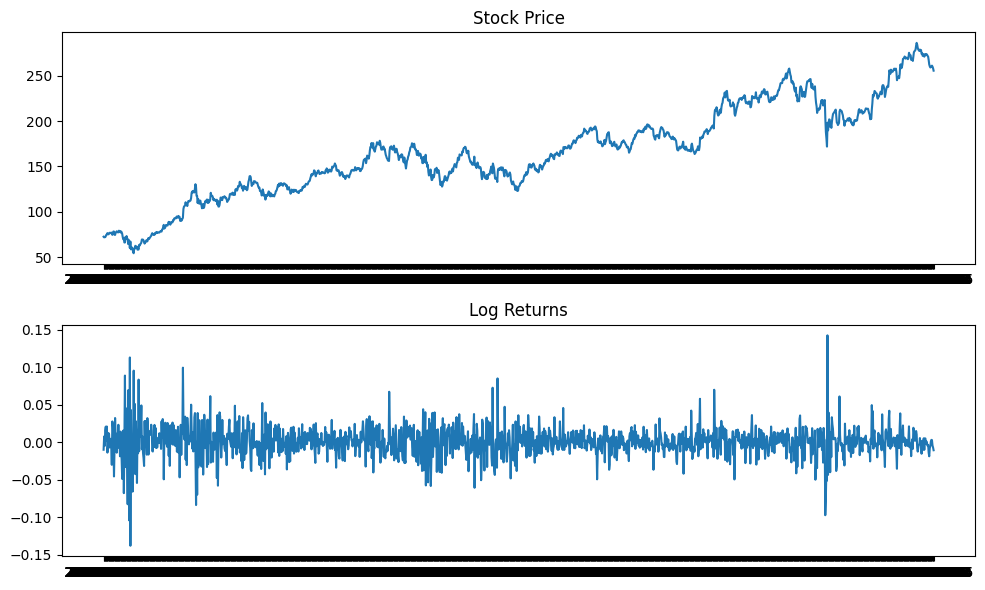

In [16]:
plt.figure(figsize=(10, 6))

# Top plot: Stock price
plt.subplot(2, 1, 1)
plt.plot(prices['Close'])
plt.title("Stock Price")

# Bottom plot: Log returns
plt.subplot(2, 1, 2)
plt.plot(returns)
plt.title("Log Returns")

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

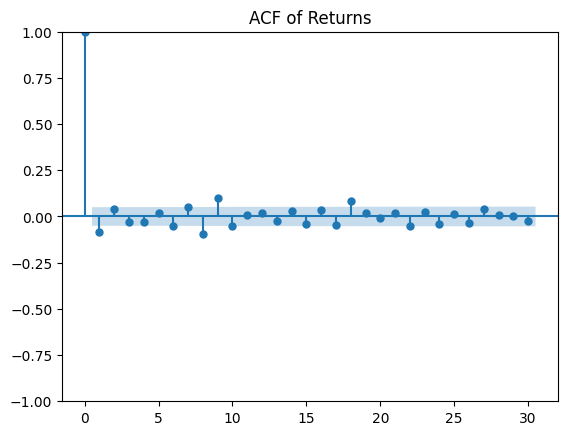

<Figure size 640x480 with 0 Axes>

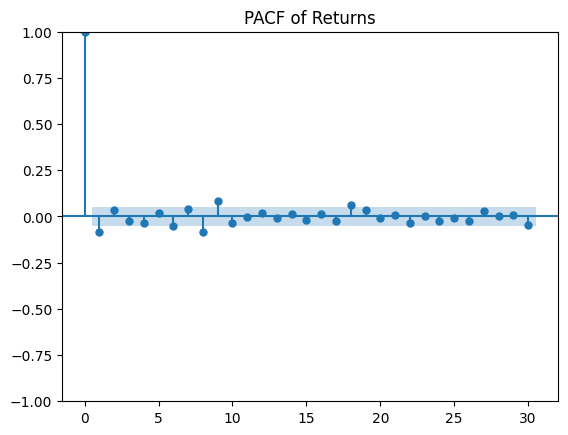

In [17]:
plt.figure()
plot_acf(returns, lags=30)
plt.title("ACF of Returns")
plt.show()

plt.figure()
plot_pacf(returns, lags=30, method="ywm")
plt.title("PACF of Returns")
plt.show()


In [18]:
#there are no significant spikes , we can now try garch on this

<Figure size 800x400 with 0 Axes>

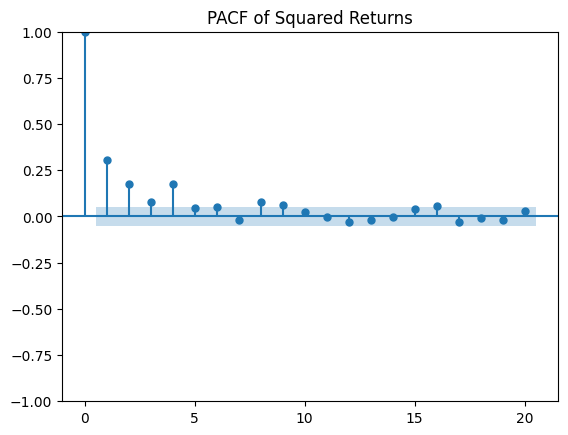

In [19]:
sq_returns = returns**2

plt.figure(figsize=(8,4))
plot_pacf(sq_returns, lags=20, method='ywm')
plt.title('PACF of Squared Returns')
plt.show()

<Figure size 800x400 with 0 Axes>

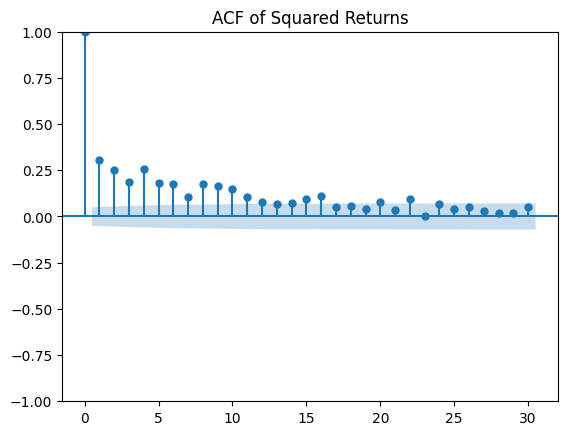

In [20]:
plt.figure(figsize=(8,4))
plot_acf(returns**2, lags=30)
plt.title('ACF of Squared Returns')
plt.show()

In [21]:
!pip install arch --quiet
from arch import arch_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 8.0 MB/s eta 0:00:00


In [22]:
best_aic = np.inf
best_order = None

for p in [1,2,3]:
    for q in [1,2]:
        try:
            model = arch_model(returns, mean='Zero', vol='GARCH', p=p, q=q)
            res = model.fit(disp='off')
            if res.aic < best_aic:
                best_aic = res.aic
                best_order = (p, q)
        except:
            pass

best_order, best_aic


/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003972. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)
/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003972. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)
/usr/local/lib/python3.12/dist-packages/arch/univariate/base

((1, 1), -7929.252785137961)

In [23]:
#The DataScaleWarning occurs because financial returns are numerically small. Rescaling returns improves numerical stability of the optimizer but does not affect the underlying GARCH dynamics or inference.

In [24]:
# Rescale returns
returns_scaled = returns * 100

# Fit GARCH(1,1)
model = arch_model(
    returns_scaled,
    mean='Zero',      # since ARIMA not needed
    vol='GARCH',
    p=1,
    q=1,
    dist='t'
)

model_fit = model.fit(disp='off')
print(model_fit.summary())


                          Zero Mean - GARCH Model Results                           
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -2963.95
Distribution:      Standardized Student's t   AIC:                           5935.91
Method:                  Maximum Likelihood   BIC:                           5957.21
                                              No. Observations:                 1518
Date:                      Wed, Jan 28 2026   Df Residuals:                     1518
Time:                              11:29:21   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega     

In [25]:
test_size = 200
rolling_predictions = []

for i in range(test_size):
    train = returns_scaled[:-(test_size - i)]

    model = arch_model(
        train,
        mean='Zero',
        vol='GARCH',
        p=1,
        q=1,
        dist = 't'
    )

    model_fit = model.fit(disp='off')

    forecast = model_fit.forecast(horizon=1)

    # Take variance → convert to volatility → undo scaling
    vol_pred = np.sqrt(forecast.variance.values[-1, 0]) / 100
    rolling_predictions.append(vol_pred)


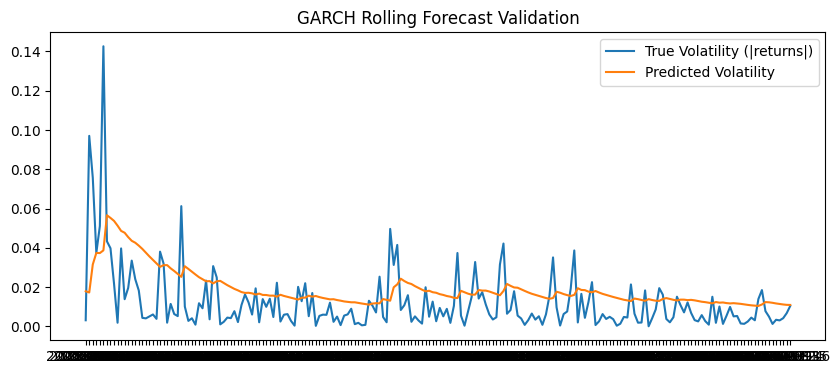

In [26]:
# Proxy for true volatility
true_vol = np.abs(returns[-test_size:])

plt.figure(figsize=(10,4))
plt.plot(true_vol, label='True Volatility (|returns|)')
plt.plot(rolling_predictions, label='Predicted Volatility')
plt.title("GARCH Rolling Forecast Validation")
plt.legend()
plt.show()


In [27]:
#The GARCH model captures volatility persistence and clustering well but underestimates extreme shocks, which is typical for Gaussian GARCH models.

In [28]:
#convert back to prices and use tests to evaluate and try to improve

In [29]:
#testing

In [30]:
true_var = returns[-test_size:]**2
pred_var = np.array(rolling_predictions)**2


In [31]:
def qlike(true_var, pred_var):
    return np.mean(np.log(pred_var) + true_var / pred_var)

ql = qlike(true_var, pred_var)
print("QLIKE:", ql)


QLIKE: -7.164509106432596


In [32]:
naive_var = np.var(returns[:-test_size]) * np.ones(test_size)

naive_qlike = np.mean(
    np.log(naive_var) + (returns[-test_size:]**2) / naive_var
)

print("Naive QLIKE:", naive_qlike)


Naive QLIKE: -6.782048239531102


In [33]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(true_var, pred_var)
print("MSE:", mse)


MSE: 2.6821940375665445e-06


In [34]:
naive_var = np.var(returns[:-test_size]) * np.ones(test_size)

naive_mse = mean_squared_error(true_var, naive_var)
print("Naive MSE:", naive_mse)


Naive MSE: 2.8171495535224565e-06


In [35]:
#The GARCH model outperforms a constant-variance benchmark, reducing variance MSE by approximately 5% under rolling forecast validation.

In [36]:
mae = np.mean(np.abs(np.sqrt(true_var) - np.sqrt(pred_var)))
print("MAE (volatility):", mae)


MAE (volatility): 0.012571086361116826


In [37]:
naive_vol = np.sqrt(np.var(returns[:-test_size])) * np.ones(test_size)

naive_mae = np.mean(np.abs(true_vol - naive_vol))
print("Naive MAE:", naive_mae)


Naive MAE: 0.014286884177261991


In [39]:
horizon = 7

forecast = model_fit.forecast(horizon=horizon)

# Convert variance → volatility and undo scaling
vol_forecast = np.sqrt(forecast.variance.values[-1, :]) / 100

print("7-day volatility forecast:")
print(vol_forecast)


7-day volatility forecast:
[0.01093369 0.01121721 0.01148892 0.0117497  0.01200037 0.0122416
 0.01247404]


In [46]:
# Align lengths
sigma = model_fit.conditional_volatility / 100
returns_aligned = returns[-len(sigma):]
prices_aligned = prices['Close'][-len(sigma):]

# Reconstruct fitted prices
fitted_prices = prices_aligned.iloc[0] * np.exp(np.cumsum(returns_aligned))


In [47]:
horizon = 7
forecast = model_fit.forecast(horizon=horizon)
vol_forecast = np.sqrt(forecast.variance.values[-1]) / 100


In [48]:
nu = model_fit.params['nu']

z = np.random.standard_t(df=nu, size=horizon)
z /= np.sqrt(nu / (nu - 2))  # unit variance

forecast_returns = vol_forecast * z


In [49]:
last_price = prices['Close'].iloc[-1]
forecast_prices = last_price * np.exp(np.cumsum(forecast_returns))


In [52]:
upper = last_price * np.exp(np.cumsum(2 * vol_forecast))
lower = last_price * np.exp(np.cumsum(-2 * vol_forecast))


In [59]:
prices.index = pd.to_datetime(prices.index)

last_date = prices.index[-1]

forecast_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=1),
    periods=7,
    freq=prices.index.inferred_freq
)

forecast_dates = pd.to_datetime(forecast_dates)


In [60]:
print(type(forecast_dates))
print(forecast_dates.dtype)


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
datetime64[ns]


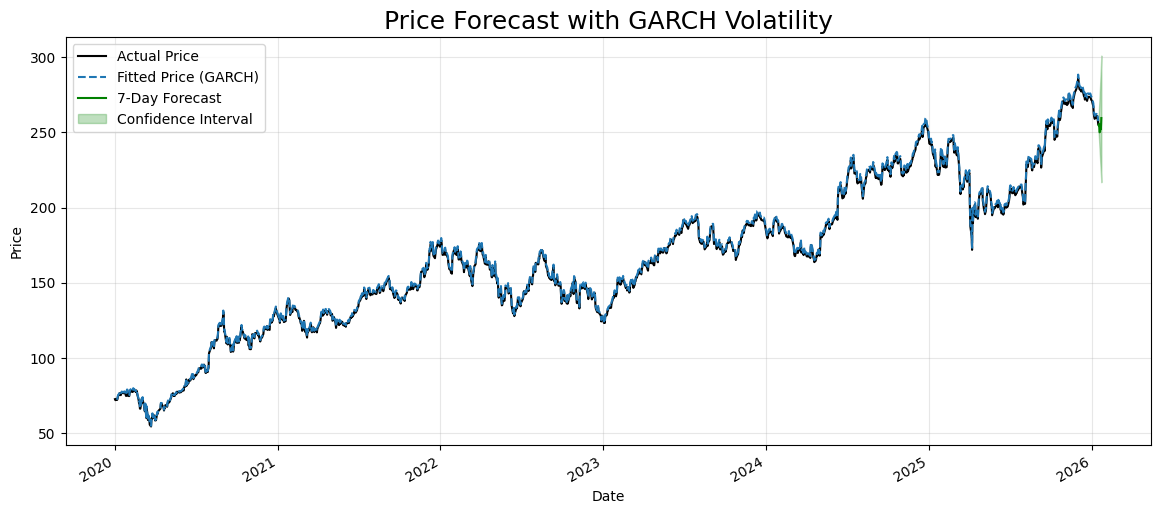

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ---- FORCE PURE DATETIME INDEXES ----
x_hist = pd.DatetimeIndex(prices.index)
x_fit  = pd.DatetimeIndex(prices_aligned.index)
x_fut  = pd.DatetimeIndex(forecast_dates)

y_hist = prices['Close'].values
y_fit  = np.asarray(fitted_prices)
y_fut  = np.asarray(forecast_prices)

upper = np.asarray(upper)
lower = np.asarray(lower)

# ---- CLEAN FIGURE ----
plt.close('all')
fig, ax = plt.subplots(figsize=(14,6))

# ---- FORCE DATE AXIS ----
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(ax.xaxis.get_major_locator()))

# ---- PLOTS ----
ax.plot(x_hist, y_hist, label='Actual Price', color='black')
ax.plot(x_fit, y_fit, linestyle='--', label='Fitted Price (GARCH)')
ax.plot(x_fut, y_fut, color='green', label='7-Day Forecast')

ax.fill_between(
    x_fut,
    lower,
    upper,
    color='green',
    alpha=0.25,
    label='Confidence Interval'
)

ax.set_title("Price Forecast with GARCH Volatility", fontsize=18)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(alpha=0.3)

fig.autofmt_xdate()
plt.show()


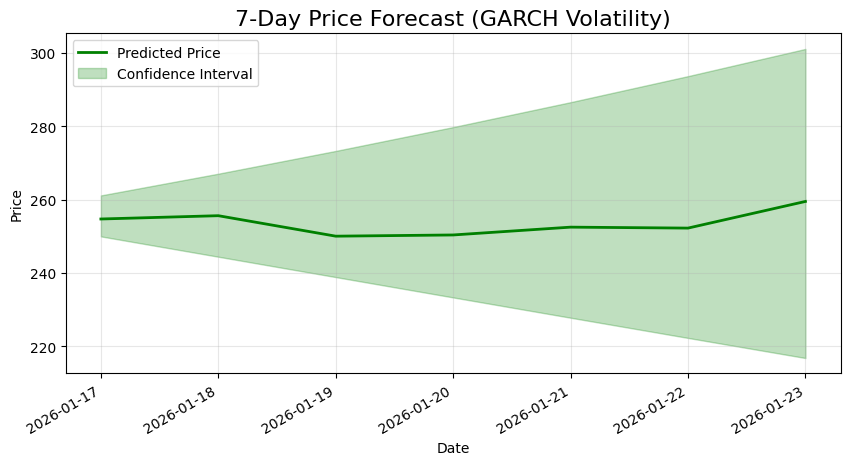

In [64]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# ---- Ensure clean datetime index ----
x_fut = pd.DatetimeIndex(forecast_dates)

y_fut = np.asarray(forecast_prices)
upper_band = np.asarray(upper)
lower_band = np.asarray(lower)

# ---- New clean figure ----
plt.close('all')
fig, ax = plt.subplots(figsize=(10,5))

# ---- Force date axis ----
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(ax.xaxis.get_major_locator()))

# ---- Forecast line ----
ax.plot(
    x_fut,
    y_fut,
    color='green',
    linewidth=2,
    label='Predicted Price'
)

# ---- Confidence interval ----
ax.fill_between(
    x_fut,
    lower_band,
    upper_band,
    color='green',
    alpha=0.25,
    label='Confidence Interval'
)

ax.set_title("7-Day Price Forecast (GARCH Volatility)", fontsize=16)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(alpha=0.3)

fig.autofmt_xdate()
plt.show()


In [69]:
import yfinance as yf
new_data = yf.download("AAPL", start="2026-01-16", end="2026-01-23")
new_data.head()


/tmp/ipython-input-3417423070.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  new_data = yf.download("AAPL", start="2026-01-16", end="2026-01-23")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-01-16,255.529999,258.899994,254.929993,257.899994,72142800
2026-01-20,246.699997,254.789993,243.419998,252.729996,80267500
2026-01-21,247.649994,251.559998,245.179993,248.699997,54641700
2026-01-22,248.350006,251.000000,248.149994,249.199997,39708300


In [72]:
data.to_csv("AAPL1.csv", index=True)


In [73]:
new_prices = pd.read_csv(
    "AAPL1.csv",
    index_col=0,
    parse_dates = True
    )

/tmp/ipython-input-911095516.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_prices = pd.read_csv(


In [75]:
new_prices['Close'] = pd.to_numeric(new_prices['Close'], errors='coerce')
new_prices = new_prices.dropna(subset=['Close'])

Text(0.5, 1.0, 'Latest Stock Price')

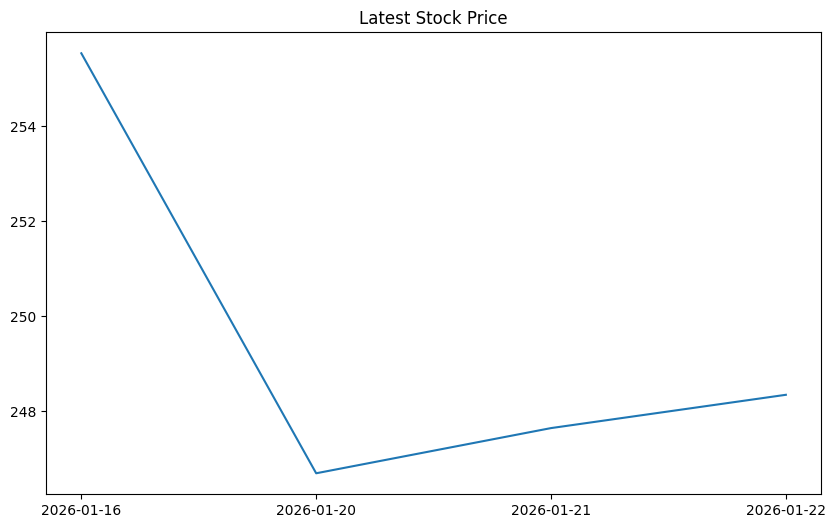

In [76]:
plt.figure(figsize=(10, 6))

# Top plot: Stock price
#plt.subplot(2, 1, 1)
plt.plot(new_prices['Close'])
plt.title("Latest Stock Price")